In [189]:
# Thư viện xử lý dữ liệu
import pandas as pd
import numpy as np
# Thư viện Machine Learning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Thư viện visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
# iris = load_iris()

# df = pd.DataFrame(
#     data=iris.data,
#     columns = iris.feature_names
# )
# df['target']=iris.target
# df['species'] = df['target'].map({
#     0:'setosa',
#     1:'versicolor',
#     2:'virginica'
# })

# print(df.head())
# print(df.info())
# print(df.describe())

In [191]:
iris = load_iris()

df= pd.DataFrame(
    data = iris.data,
    columns = iris.feature_names
)

print(df.head())
print(df.info())
print(df.describe)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width 

In [192]:
# X = df[['sepal length (cm)', 'sepal width (cm)',
# 'petal length (cm)', 'petal width (cm)']]
# y = df['target']

# Hoặc sử dụng trực tiếp từ iris object
X = iris.data
y = iris.target
print(f"Shape của X: {X.shape}")
print(f"Shape của y: {y.shape}")

Shape của X: (150, 4)
Shape của y: (150,)


In [193]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size =0.3,
    random_state=42,
    stratify=y
)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Train set: (105, 4)
Test set: (45, 4)


In [194]:
scaler = StandardScaler()
# Fit trên train set và transform cả train và test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Kiểm tra mean và std sau chuẩn hóa
print("Mean sau scaling:",
X_train_scaled.mean(axis=0))
print("Std sau scaling:", X_train_scaled.std(axis=0))

Mean sau scaling: [ 2.38327876e-15 -1.12145742e-15 -1.37456184e-16 -6.97854473e-17]
Std sau scaling: [1. 1. 1. 1.]


In [195]:
# Tạo mô hình Logistic Regression
model = LogisticRegression(
multi_class='multinomial', # Cho phân loại đa lớp
solver='lbfgs', # Thuật toán tối ưu
max_iter=1000, # Số iterations tối đa
random_state=42 # Reproducibility
)


In [196]:
# Huấn luyện mô hình
model.fit(X_train_scaled, y_train)
# Dự đoán trên tập test
y_pred = model.predict(X_test_scaled)
# Dự đoán xác suất cho mỗi lớp
y_pred_proba = model.predict_proba(X_test_scaled)
print("Dự đoán (5 mẫu đầu):", y_pred[:5])
print("Xác suất (5 mẫu đầu):")
print(y_pred_proba[:5])

Dự đoán (5 mẫu đầu): [2 1 1 1 2]
Xác suất (5 mẫu đầu):
[[3.28358312e-05 1.01448072e-01 8.98519092e-01]
 [1.41182995e-02 7.89437074e-01 1.96444626e-01]
 [3.58121931e-03 6.20192330e-01 3.76226450e-01]
 [2.18102444e-02 6.29198388e-01 3.48991368e-01]
 [5.15171433e-03 3.84550988e-01 6.10297298e-01]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [197]:
# Tính accuracy
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
# Hoặc sử dụng accuracy_score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Train Accuracy: 0.9810
Test Accuracy: 0.9111
Accuracy: 0.9111


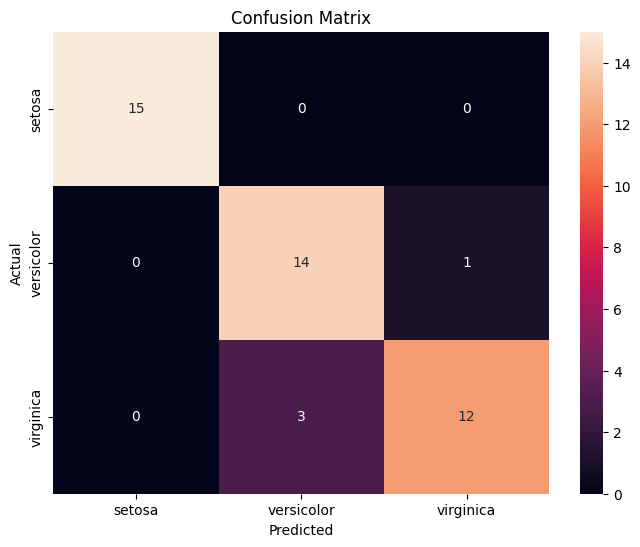

In [198]:
# Ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
xticklabels=iris.target_names,
yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [199]:
from sklearn.metrics import classification_report
report = classification_report(
y_test, y_pred,
target_names=iris.target_names
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [200]:
# Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

print("Đang tải dữ liệu MNIST (sẽ mất khoảng 30s - 1 phút)...")
# as_frame=False: Để lấy dữ liệu dạng Numpy Array luôn (tránh lỗi AttributeError: no attribute 'reshape')
mnist = fetch_openml('mnist_784', version=1, parser='auto', as_frame=False)

X = mnist.data.astype('float32')
y = mnist.target.astype('int')

print(f"Shape của X: {X.shape}") # Phải ra (70000, 784) mới đúng

# Chia train/test (Bước này cực quan trọng để ghi đè biến X_test cũ của hoa Iris)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Chuẩn hóa dữ liệu về khoảng 0-1
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

print("Đã tải và xử lý xong dữ liệu MNIST!")

Đang tải dữ liệu MNIST (sẽ mất khoảng 30s - 1 phút)...
Shape của X: (70000, 784)
Đã tải và xử lý xong dữ liệu MNIST!


In [201]:

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print(f"Shape sau flatten: {X_train_flat.shape}")


Shape sau flatten: (59500, 784)


In [202]:
X_train_normalized = X_train_flat / 255.0
X_test_normalized = X_test_flat / 255.0
print(f"Giá trị sau chuẩn hóa: min={X_train_normalized.min()},max={X_train_normalized.max()}")

Giá trị sau chuẩn hóa: min=0.0,max=1.0


In [203]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
multi_class='multinomial',
solver='saga', 
max_iter=100, 
tol=0.1, 
verbose=1, 
n_jobs=-1, 
random_state=42
)


In [204]:
import time
print("Bắt đầu huấn luyện...")
start_time = time.time()

model.fit(X_train_normalized, y_train)
end_time = time.time()
print(f"Hoàn thành sau {end_time - start_time:.2f} giây")



Bắt đầu huấn luyện...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 4 epochs took 10 seconds
Hoàn thành sau 10.19 giây


In [205]:
# Dự đoán cho 10,000 ảnh test
y_pred = model.predict(X_test_normalized)
# Xem một số dự đoán
print("10 dự đoán đầu tiên:", y_pred[:10])
print("10 nhãn thực tế:", y_test[:10])
# Dự đoán xác suất
y_pred_proba = model.predict_proba(X_test_normalized)
print("\nXác suất cho ảnh đầu tiên:")
print(y_pred_proba[0])
print(f"Dự đoán: {y_pred[0]}, Xác suất: {y_pred_proba[0]
[y_pred[0]]:.4f}")


10 dự đoán đầu tiên: [8 4 5 7 7 0 6 2 7 4]
10 nhãn thực tế: [8 4 8 7 7 0 6 2 7 4]

Xác suất cho ảnh đầu tiên:
[3.4767629e-09 1.9502527e-10 3.5368041e-06 4.5804161e-05 6.7646919e-09
 5.4215873e-04 9.2015243e-11 2.6499944e-10 9.9940801e-01 4.2215328e-07]
Dự đoán: 8, Xác suất: 0.9994


In [206]:
from sklearn.metrics import accuracy_score
train_acc = model.score(X_train_normalized, y_train)
test_acc = model.score(X_test_normalized, y_test)
print(f"Train Accuracy: {train_acc:.4f}")

Train Accuracy: 0.9306


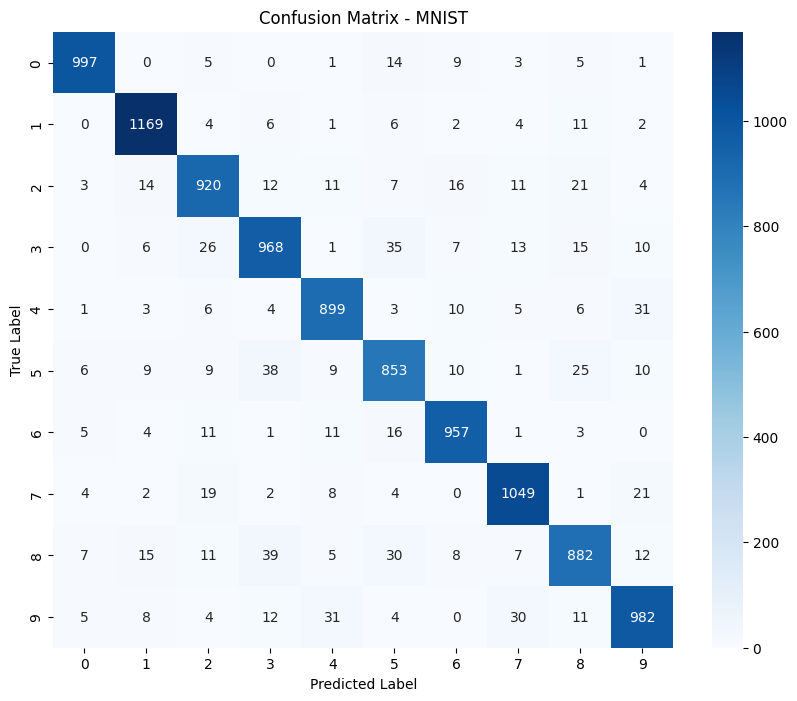

In [207]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MNIST')
plt.show()


Số lượng dự đoán sai: 824


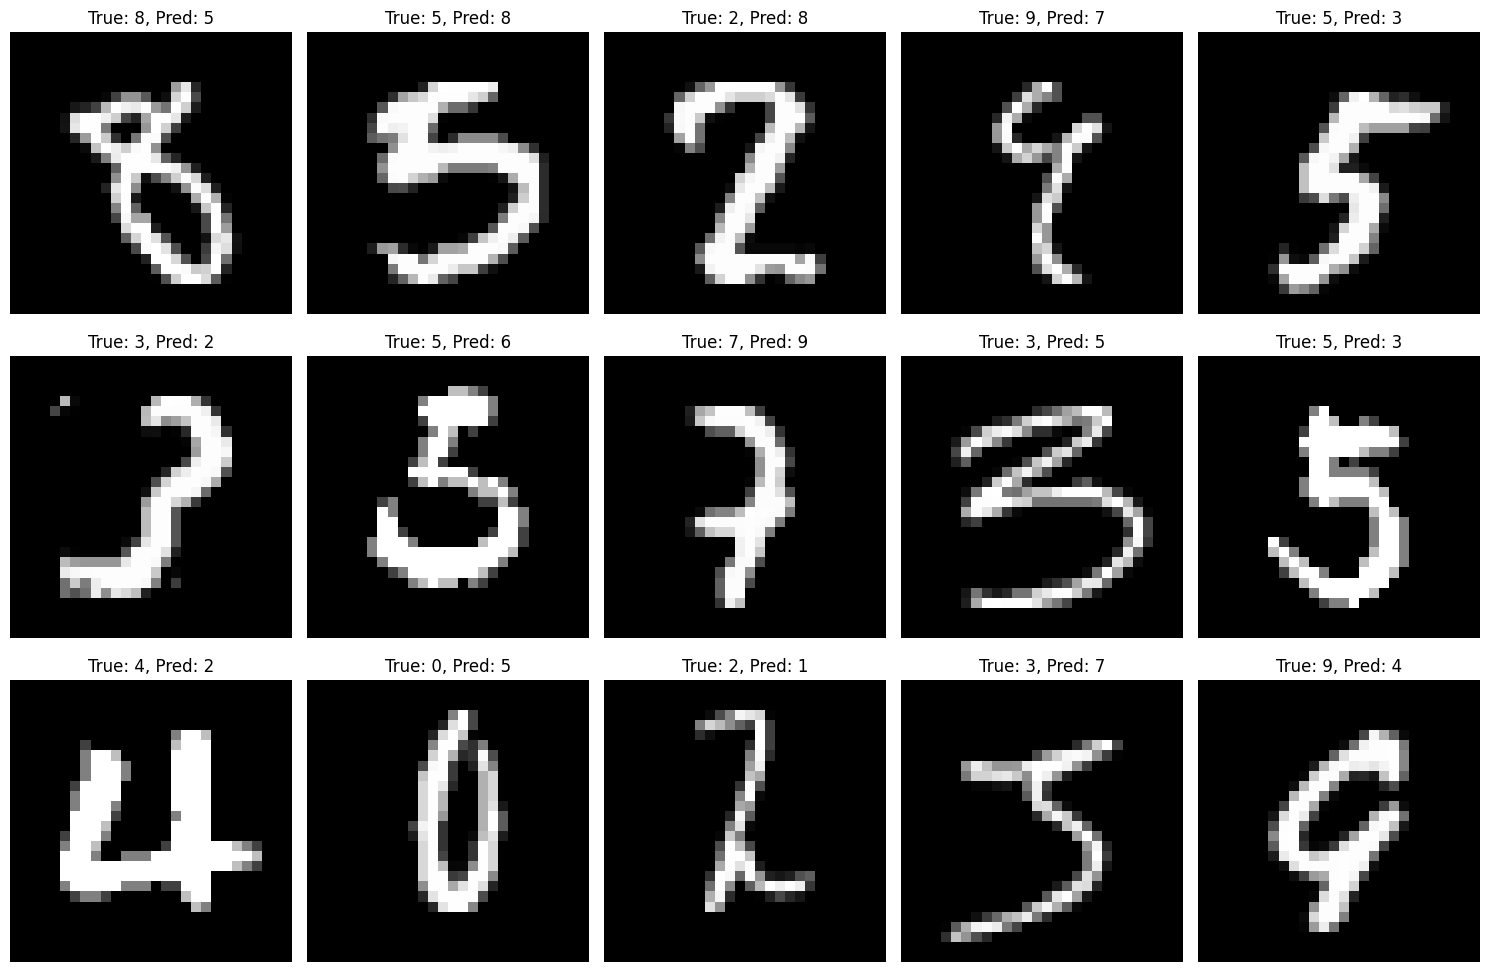

In [209]:
# Tìm các chỉ số dự đoán sai
incorrect_indices = np.where(y_pred != y_test)[0]
print(f"Số lượng dự đoán sai: {len(incorrect_indices)}")

# Tạo khung vẽ
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.ravel()

# Vòng lặp vẽ ảnh (Lưu ý các dòng bên dưới for đều được thụt vào)
for i, idx in enumerate(incorrect_indices[:15]):
    # Lấy ảnh tại vị trí idx và reshape về 28x28
    current_image = X_test[idx].reshape(28, 28)
    
    axes[i].imshow(current_image, cmap='gray')
    axes[i].set_title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()